In [ ]:
path = "/content/iris_scsled.txt"

In [2]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 3.8 MB/s 
     |████████████████████████████████| 18.0 MB 74 kB/s 
     |████████████████████████████████| 238 kB 45.4 MB/s 
     |████████████████████████████████| 200 kB 54.4 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 1.6 MB 48.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 943 kB 54.0 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 3.6 MB 40.1 MB/s 
     |████████████████████████████████| 113 kB 49.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=e5508bfa030a52eb53f2394297cb608ce6bff15da8889445fb6b7f3deacc7a5a
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c94

In [5]:
!pip install qiskit_aqua


     |████████████████████████████████| 2.1 MB 4.4 MB/s 
     |████████████████████████████████| 634 kB 55.0 MB/s 
     |████████████████████████████████| 6.4 MB 39.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for dlx: filename=dlx-1.0.4-py3-none-any.whl size=5718 sha256=970dc01d8f7924ebbbaa323c1bed8dc3a3544d2a8513ed342f1fa05c8285439f
  Stored in directory: /root/.cache/pip/wheels/78/55/c8/dc61e772445a566b7608a476d151e9dcaf4e092b01b0c4bc3c
  Created wheel for docplex: filename=docplex-2.22.213-py3-none-any.whl size=696882 sha256=de793fef9b375e1c030fc012784a79f58873dba38e93f382c8adc4e89f87c22f
  Stored in directory: /root/.cache/pip/wheels/90/69/6b/1375c68a5b7ff94c40263b151c86f58bd72200bf0c465b5ba3
Successfully built dlx docplex
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lx

In [42]:
!pip install pylatexenc

     |████████████████████████████████| 162 kB 4.1 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=2b9dd1f1b83a06e8693a4ed6952da347d3d25d3c7bde62a43c81c41ca53afafb
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from qiskit import *
import numpy as np
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC
import time
from sklearn.datasets import fetch_openml


In [8]:
mnist = fetch_openml('mnist_784', cache=False)

In [14]:
data = mnist.data
target = mnist.target

In [18]:
data = data.astype('float')
target = target.astype('int')

In [22]:
data = data.iloc[:10000].to_numpy()
target = target.iloc[:10000].to_numpy()


In [23]:
#SVD to reduce to 10 dimensions
tsvd = TruncatedSVD(n_components = 10)
X_SVD = tsvd.fit_transform(data)

#t-SNE to reduce dimensions to 2
np.random.seed(0)
tsne = TSNE(n_components = 2)
train_data = tsne.fit_transform(X_SVD)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


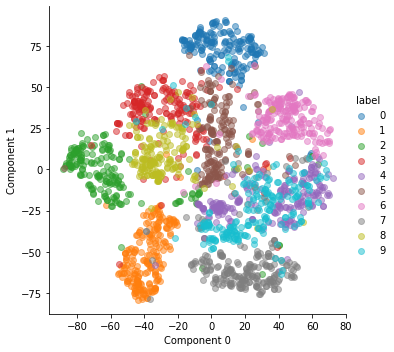

In [27]:
def plotdataset(X,Y,c1,c2,N):
  cmp1 = f"Component {c1}"
  cmp2 = f"Component {c2}"
  dataset = pd.DataFrame({cmp1:X[:N,c1], cmp2:X[:N,c2], 'label':Y[:N]})
  sns.lmplot(data=dataset, x =cmp1, y=cmp2, fit_reg=False, hue='label',scatter_kws={'alpha':0.5})
  return

plotdataset(train_data,target,0,1,N=2000)

In [40]:
# Normalizing Data
one_data_array = []
seven_data_array = []
for i in range(10000):
  if target[i] == 1:
    one_data_array.append(train_data[i,:])
for i in range(10000):
  if target[i] == 7:
    seven_data_array.append(train_data[i,:])  
ones = np.array(one_data_array)
sevens = np.array(seven_data_array)

def normalize(arr,max_val,n):
  a = np.divide(arr,max_val)
  return a +n
norm_ones = normalize(ones,100,1)
norm_sevens = normalize(sevens,100,1)


In [45]:
# Build feature map circuit 


feature_dim = 2
pauli_feature_map = PauliFeatureMap(feature_dimension = feature_dim, reps = 1, paulis = ['Z','X','ZY'])
pauli_feature_map.draw()

┌─────────────────────────────┐
q_0: ┤0                            ├
     │  PauliFeatureMap(x[0],x[1]) │
q_1: ┤1                            ├
     └─────────────────────────────┘

In [48]:
#append variational circuit
from qiskit.circuit.library import RealAmplitudes 

num_qubits = 2 
variational_circ = RealAmplitudes(num_qubits, entanglement='full', reps = 3)
variational_circ.draw()

┌──────────────────────────────────────────────────────────┐
q_0: ┤0                                                         ├
     │  RealAmplitudes(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7]) │
q_1: ┤1                                                         ├
     └──────────────────────────────────────────────────────────┘

In [ ]:
# custom feature_map

from qiskit.circuit import QuantumCircuit, ParameterVector

num_qubits = 3            
iter = 1              # number of times you'd want to repeat the circuit

x = ParameterVector('x', length=num_qubits)  # creating a list of Parameters
custom_circ = QuantumCircuit(num_qubits)

# defining our parametric form
for _ in range(iter):
    for i in range(num_qubits):
        custom_circ.rx(x[i], i)
    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            custom_circ.cx(i, j)
            custom_circ.u1(x[i] * x[j], j)
            custom_circ.cx(i, j)
            
custom_circ.draw()

In [59]:
from qiskit.circuit.library  import EfficientSU2
var_circuit = EfficientSU2(feature_dim, reps = 2)
var_circuit.draw()

»
q_0: »
     »
q_1: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                             ├
«     │  EfficientSU2(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11]) │
«q_1: ┤1                                                                             ├
«     └──────────────────────────────────────────────────────────────────────────────┘

In [69]:
train_size = 200 
test_size = 100
dp_size_one = 5
dp_size_seven = 5

one_train = norm_ones[:train_size]
seven_train = norm_sevens[:train_size]

one_test = norm_ones[train_size+1:train_size+test_size+1] 
seven_test = norm_sevens[train_size+1:train_size+test_size+1]

training_input = {'A':one_train,'B':seven_train }
test_input = {'A': one_test, 'B':seven_test}

val_data = []
v_dp_one = norm_ones[train_size+test_size+2:train_size+test_size+2+dp_size_one]
v_dp_seven = norm_sevens[train_size+test_size+2:train_size+test_size+2+dp_size_seven]

datapoints = []
datapoints.append(np.concatenate((v_dp_one,v_dp_seven)))
v_dp_y = np.array([0,0,0,0,0,1,1,1,1,1])
datapoints.append(v_dp_y)

class_to_label = {'A':0,'B':1}



In [57]:
seed = 1000
feature_dim= one_train.shape[1]
feature_map = ZZFeatureMap(feature_dimension = feature_dim, reps = 2, entanglement='linear')
feature_map.draw()


┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [ ]:
'''
COBYLA - Constrained Optimization By Linear Approximation optimizer.
SPSA - Simultaneous Perturbation Stochastic Approximation (SPSA) optimizer.
SLSQP - Sequential Least SQuares Programming optimizer
'''


In [ ]:
datapoints

In [58]:
from qiskit.aqua.components.optimizers import COBYLA
cobyla = COBYLA(maxiter = 500, tol= 0.001)


In [61]:
backend = BasicAer.get_backend('qasm_simulator')
backend_options = {'method':'statevector'}
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator = seed, seed_transpiler =seed, backend_options=backend_options )

In [71]:
vqc = VQC( optimizer = cobyla, feature_map = feature_map , var_form = var_circuit,
          training_dataset = training_input, test_dataset = test_input, datapoints= datapoints[0])

In [72]:
result = vqc.run(quantum_instance)

print("testing accuracy: {}".format(result['testing_accuracy']))
print("prediction of datapoints:")
print("Actual: {}".format(map_label_to_class_name(datapoints[1], vqc.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

testing accuracy: 0.955
prediction of datapoints:
Actual: ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
prediction:   ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


In [68]:
vqc.predict(datapoints[0])

(array([[0.69628906, 0.30371094],
        [0.65625   , 0.34375   ],
        [0.72167969, 0.27832031],
        [0.67871094, 0.32128906],
        [0.64160156, 0.35839844],
        [0.33300781, 0.66699219],
        [0.40234375, 0.59765625],
        [0.60351562, 0.39648438],
        [0.32519531, 0.67480469],
        [0.45800781, 0.54199219]]), array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1]))